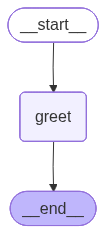

Hello, Nice to meet you!
None


In [5]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import Literal, Optional, TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.checkpoint.memory import MemorySaver
import uvicorn
import uuid
from typing import TypedDict

class State(TypedDict):
    pass
     

def greet_user(state: State):
    print("Hello, Nice to meet you!")
    return {}   # state unchanged

workflow = StateGraph(State)
workflow.add_node("greet", greet_user)
workflow.add_edge(START, "greet")
workflow.add_edge("greet", END) 
app = workflow.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
initial_state = {
}

result = app.invoke(initial_state)
print(result)



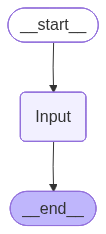

{'number': 12, 'result': ''}


In [2]:
class Stateclass(TypedDict):
    number:int
    result:str
def A(state:Stateclass):
    return {"number":state['number']+2}

workflow = StateGraph(Stateclass)


workflow.add_node("Input",A)
workflow.add_edge(START,"Input")
workflow.add_edge("Input",END)
app = workflow.compile()


from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
initial_state = {
"number":10,
"result":""
}
result = app.invoke(initial_state)
print(result)


In [3]:
class State(TypedDict):
    msg:str
     

def input_message(state: State):
    return {"msg": "AR"}
def output_message(state:State):
    state['msg'] = "AR2"
    print(state['msg'])
    return {}
workflow = StateGraph(State)
workflow.add_node("inp",input_message)
workflow.add_node("out", output_message)

workflow.add_edge(START, "inp")
workflow.add_edge("inp", "out")
workflow.add_edge("out", END) 
app = workflow.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
initial_state = {

}
result = app.invoke({initial_state})
print(result)


KeyboardInterrupt: 

State Understanding!!!

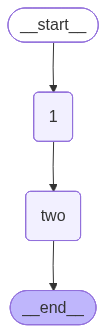

Executing Node A hello
Executing Node B world
Mr. Rafique


{'one': 'Noman', 'two': 'world'}

In [ ]:
class State2(TypedDict):
    one: str
    two: str

def one(state:State2):
    print("Executing Node A",state['one'])
    return {"one":"Noman"}
    


def two(state:State2):
    print("Executing Node B",state['two'])
    state['two'] = "Mr. Rafique"
    print(state['two'])
    return {}


workflow = StateGraph(State2)
workflow.add_node("1",one)
workflow.add_node("two",two)

workflow.add_edge(START,"1")
workflow.add_edge("1","two")
workflow.add_edge("two",END )
app = workflow.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
state = {
    "one":"hello",
    "two":"world"
}
app.invoke(state)

Workflow

Parallel Workflow

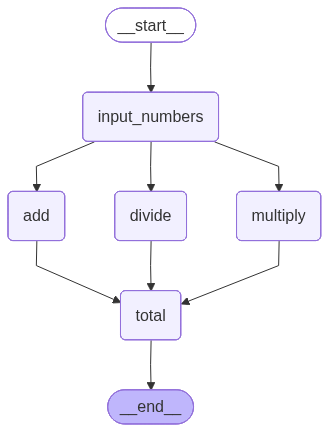

Add node is runningDivide node is running

multiply node is running
Addition: 30
Division: 2.0
Multiplication: 200


{'number1': 20,
 'number2': 10,
 'add': 30,
 'multi': 200,
 'div': 2.0,
 'total': 232.0}

In [ ]:
from langgraph.graph import StateGraph, END

class State(TypedDict):
    number1: int
    number2: int
    add: int
    multi: int
    div: int
    total: int
    
def input_numbers(state:State):
    number1 = int(input("Enter first number: "))
    number2 = int(input("Enter second number: "))
    return {"number1": number1, "number2": number2}

def add(state: State):
    print  ("Add node is running")
    result = state["number1"] + state["number2"]
    return {"add": result}


def divide(state: State):
    print  ("Divide node is running")

    result = state["number1"] / state["number2"]
    return {"div": result}


def multiply(state: State):
    print  ("multiply node is running")
    
    result = state["number1"] * state["number2"]
    return {"multi": result}



def total(state: State):
    print(f"Addition: {state['add']}")
    print(f"Division: {state['div']}")
    print(f"Multiplication: {state['multi']}")
    return {"total": state["add"] + state["div"] + state["multi"]}

workflow = StateGraph(State)
workflow.add_node("input_numbers",input_numbers)
workflow.add_node("add",add)
workflow.add_node("divide",divide)
workflow.add_node("multiply",multiply)
workflow.add_node("total",total)

workflow.add_edge(START,"input_numbers")
workflow.add_edge("input_numbers","add")
workflow.add_edge("input_numbers","divide")
workflow.add_edge("input_numbers","multiply")
workflow.add_edge("add","total")
workflow.add_edge("divide","total")
workflow.add_edge("multiply","total")
workflow.add_edge("total",END)
app = workflow.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
app.invoke({})

Conditional Edge Cases

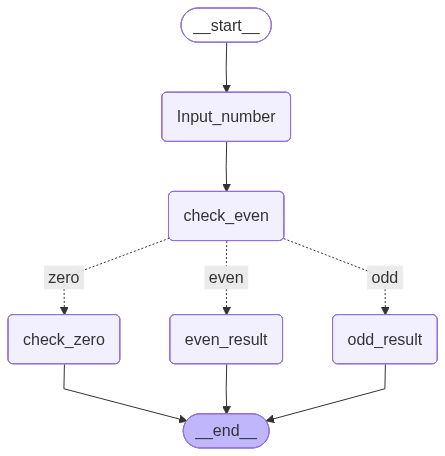

In [ ]:
class State(TypedDict):
    number: int
    even_odd:str


def Input_number(state:State):
    number= input("Enter a number: ")
    number=int(number)
    return {"number":number}


def check_even(state:State):
    if state["number"]%2==0:
        return {"even_odd":"even"}
    elif state["number"]==0:
        return {"even_odd":"zero"}
    else:
        return {"even_odd":"odd"}
def check_zero(state:State):
    print  ("That Number is zero")

def even_result(state:State):
    print("That Number is even")

    
def odd_result(state:State):
    print("That Number is odd")



workflow = StateGraph(State)
workflow.add_node("Input_number",Input_number)
workflow.add_node("check_even",check_even)
workflow.add_node("check_zero",check_zero)
workflow.add_node("even_result",even_result)
workflow.add_node("odd_result",odd_result)

workflow.add_edge(START,"Input_number")
workflow.add_edge("Input_number","check_even")
workflow.add_conditional_edges("check_even",check_even,{
    "even":"even_result",
    "odd":"odd_result",
    "zero":"check_zero"
}) 
workflow.add_edge("even_result",END)
workflow.add_edge("odd_result",END)
workflow.add_edge("check_zero",END)

app = workflow.compile()

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

Iterative Workflow


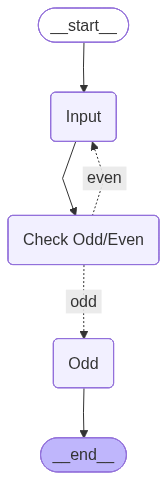

In [ ]:

from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import Literal, Optional, TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.checkpoint.memory import MemorySaver
import uvicorn
import uuid
from typing import TypedDict


class State(TypedDict):
    number: int
    result: str


def input_number(state: State):
    number = int(input("Please enter the number to check Odd/Even"))
    return {"number": number}


def even_odd(state:State):
    if state['number'] % 2 == 0:
        return {"result": "even"}
    else:
        return {"result": "odd"}


def router_function(state:State):
    return state['result']

def odd(state:State):
    print(f"Your {state['number']} is odd",state['result'])



workflow = StateGraph(State)
workflow.add_node("Input",input_number)
workflow.add_node("Check Odd/Even",even_odd)
workflow.add_node("Odd",odd)


workflow.add_edge(START,"Input")
workflow.add_edge("Input","Check Odd/Even")
workflow.add_conditional_edges("Check Odd/Even",even_odd,{
    "even":"Input",
    "odd":"Odd"
})


workflow.add_edge("Odd",END)

app = workflow.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


Conversational Chatbot using Reducers


In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI

from langgraph.graph.message import add_messages
import os

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])


class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}



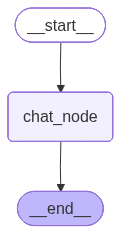

In [ ]:
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()

chatbot

In [ ]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is New Delhi.'

In [ ]:

chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='What is the capital of india', additional_kwargs={}, response_metadata={}, id='07d92169-1b3d-4a84-8874-d750826793f2'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 13, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-D1QObWiENNaJVnTm65ICD9IMkcygB', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bee74-640c-7800-bd2c-cc804727536c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 8, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_toke

In [ ]:
while True:
    question= input("What do you want to ask?")
    if question.lower() == "exit" or question.lower() == "quit" or question.lower() == "q":
        break
    response = chatbot.invoke({"messages":[HumanMessage(content=question)]})
    print("AI response",response["messages"][-1].content)



AI response Hello! How can I assist you today?
AI response Hello Nomi! How can I assist you today?


In [ ]:
response

{'messages': [HumanMessage(content='nomi', additional_kwargs={}, response_metadata={}, id='ea9f2682-88d4-4474-810e-7bdcbb7d7d41'),
  AIMessage(content='Hello Nomi! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 9, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-D1QWfTsToQkJyy5aflDAlap01QYjc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bee7c-05dd-7053-9417-039e41aaf0e0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tokens': 11, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio

Adding InMemory for Persistence

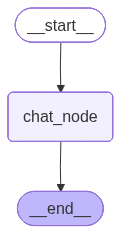

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)
checkpointer = MemorySaver()
chatbot = graph.compile(checkpointer=checkpointer)

chatbot

In [ ]:
thread_id = "1"
config = {"configurable":{"thread_id":thread_id}}
while True:
    question= input("What do you want to ask?")
    if question.lower() == "exit" or question.lower() == "quit" or question.lower() == "q":
        break
    response = chatbot.invoke({"messages":[HumanMessage(content=question)]}, config=config)
    print("AI response",response["messages"][-1].content)



AI response Hello Nomi! How can I assist you today?
AI response Your name is Nomi and you are 27 years old. How can I help you today, Nomi?
AI response If I add 10 to your age of 27, you would be 37 years old. Is there anything else you would like to know or discuss, Nomi?


In [ ]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='my name os nomi', additional_kwargs={}, response_metadata={}, id='c97d1a3a-c32c-42de-908e-6d6748e4c142'), AIMessage(content='Nice to meet you Nomi! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 12, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-D1Qrv8xE8UBfSLD64FLInrI8Ivwwl', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bee90-2652-7642-8bb3-c51978caeabe-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens': 14, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache

Persistence in Workflow

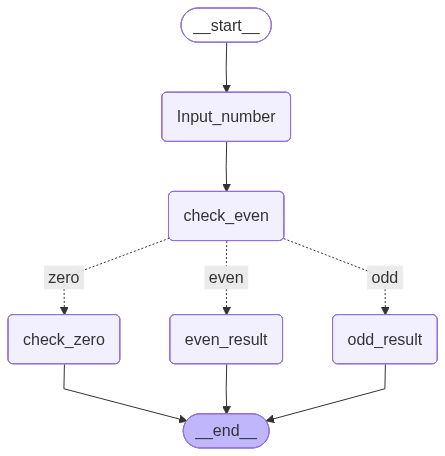

In [11]:
class State(TypedDict):
    number: int
    even_odd:str


def Input_number(state:State):
    number= input("Enter a number: ")
    number=int(number)
    return {"number":number}


def check_even(state: State):
    if state["number"] == 0:
        return {"even_odd": "zero"}
    elif state["number"] % 2 == 0:
        return {"even_odd": "even"}
    else:
        return {"even_odd": "odd"}
def route_even(state: State):
    return state["even_odd"]


def check_zero(state:State):
    print  ("That Number is zero")

def even_result(state:State):
    print("That Number is even")

    
def odd_result(state:State):
    print("That Number is odd")


checkpointer = MemorySaver()
workflow = StateGraph(State)
workflow.add_node("Input_number",Input_number)
workflow.add_node("check_even",check_even)
workflow.add_node("check_zero",check_zero)
workflow.add_node("even_result",even_result)
workflow.add_node("odd_result",odd_result)

workflow.add_edge(START,"Input_number")
workflow.add_edge("Input_number","check_even")
workflow.add_conditional_edges(
    "check_even",
    route_even,   # ✅ sirf string return karega
    {
        "even": "even_result",
        "odd": "odd_result",
        "zero": "check_zero"
    }
)


workflow.add_edge("even_result",END)
workflow.add_edge("odd_result",END)
workflow.add_edge("check_zero",END)

thread_id = "3"
config = {"configurable":{"thread_id":thread_id}}
app = workflow.compile(checkpointer=checkpointer)

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({},config=config)
app.get_state(config=config)


That Number is odd


StateSnapshot(values={'number': 9, 'even_odd': 'odd'}, next=(), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa0c1-0ba4-649c-8003-1b2f6dcc58b6'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-25T16:36:57.567964+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa0c1-0ba1-6b5d-8002-4a3b10d7478a'}}, tasks=(), interrupts=())

In [14]:
list(app.get_state_history(config))

[StateSnapshot(values={'number': 9, 'even_odd': 'odd'}, next=(), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa0c1-0ba4-649c-8003-1b2f6dcc58b6'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-25T16:36:57.567964+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa0c1-0ba1-6b5d-8002-4a3b10d7478a'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'number': 9, 'even_odd': 'odd'}, next=('odd_result',), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa0c1-0ba1-6b5d-8002-4a3b10d7478a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-25T16:36:57.565806+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa0c1-0b9d-63ad-8001-e1b9eca9585e'}}, tasks=(PregelTask(id='f04dc71c-6f47-a8db-c571-4d52ed995917', name='odd_result', path=('__pregel_pull', 'odd_result'), err

In [13]:
for cp in checkpointer.list(config):
    print(
        f"Step {cp.metadata['step']} →",
        cp.checkpoint['channel_values']
    )


Step 3 → {'number': 9, 'even_odd': 'odd'}
Step 2 → {'number': 9, 'even_odd': 'odd', 'branch:to:odd_result': None}
Step 1 → {'number': 9, 'branch:to:check_even': None}
Step 0 → {'branch:to:Input_number': None}
Step -1 → {'__start__': {}}


AddingFaultTolerance

In [18]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str


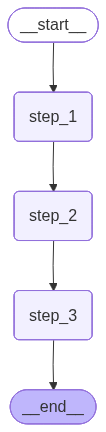

In [24]:
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {
        "step1": "done",
        "input": state["input"]
    }


def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # simulate long-running / stuck step
    return {
        "step2": "done"
    }

import time
def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {
        "step3": "done"
    }
# 3. Build the graph
builder = StateGraph(CrashState)

builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = MemorySaver()
graph = builder.compile(checkpointer=checkpointer)

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
thread_id = "5"
config = {"configurable":{"thread_id":thread_id}}


graph.invoke({"input":"start"},config=config)

In [30]:

graph.get_state(config=config)


StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '5', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa109-f196-6884-8001-184c53e74793'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-25T17:09:34.414861+00:00', parent_config={'configurable': {'thread_id': '5', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa109-f18f-6544-8000-be6731ab967c'}}, tasks=(PregelTask(id='8ec757e0-e52f-ce36-beef-c9f55e0cbfdf', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [32]:
list(graph.get_state_history(config))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '5', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa109-f196-6884-8001-184c53e74793'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-25T17:09:34.414861+00:00', parent_config={'configurable': {'thread_id': '5', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa109-f18f-6544-8000-be6731ab967c'}}, tasks=(PregelTask(id='8ec757e0-e52f-ce36-beef-c9f55e0cbfdf', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': '5', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa109-f18f-6544-8000-be6731ab967c'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-01-25T17:09:34.410858+00:00', parent_config={'configurable': {'thread_id': '5', 'checkpoint_ns': '', 'checkpoint_id': '1f0fa109-f187

Resuming the workflow

First Step1 doesn't run again because it's already run. And workflow/graph will resume from Step2.

In [33]:
final_state= graph.invoke(None,config=config)
print(final_state)

⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed
{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [34]:
final_state= graph.invoke(None,config=config)
print(final_state)

{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}
